Library import


In [35]:
from tensorflow.keras.datasets import mnist 
import matplotlib.pyplot as plt 
from PIL import Image 
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
import numpy as np

Load dataset

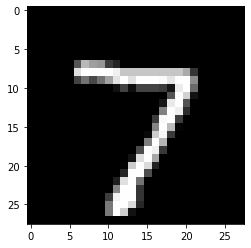

In [36]:
(x_train_org, y_train_org),(x_test_org,y_test_org) = mnist.load_data()
x_test_org[0]
n_rec = 0
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show()

Change image format

In [37]:
x_train = x_train_org.reshape(60000,784)
x_test = x_test_org.reshape(10000,784)


Normalize data

In [38]:
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255 
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

Neural Network

In [49]:
model = Sequential()
model.add(Dense(1200, input_dim=784, activation="relu"))
#model.add(Dense(400, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary()) 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1200)              942000    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                12010     
Total params: 954,010
Trainable params: 954,010
Non-trainable params: 0
_________________________________________________________________
None


NN train

In [50]:
model.fit(x_train, y_train, batch_size=128, epochs=40, verbose=1)
model.save_weights('model.h5')
model.load_weights('model.h5')

Epoch 1/40
469/469 [==============================] - 7s 14ms/step - loss: 0.4119 - accuracy: 0.8798
Epoch 2/40
469/469 [==============================] - 7s 14ms/step - loss: 0.0939 - accuracy: 0.9721
Epoch 3/40
469/469 [==============================] - 7s 14ms/step - loss: 0.0550 - accuracy: 0.9834
Epoch 4/40
469/469 [==============================] - 7s 14ms/step - loss: 0.0346 - accuracy: 0.9900
Epoch 5/40
469/469 [==============================] - 7s 14ms/step - loss: 0.0261 - accuracy: 0.9924
Epoch 6/40
469/469 [==============================] - 7s 14ms/step - loss: 0.0177 - accuracy: 0.9951
Epoch 7/40
469/469 [==============================] - 7s 14ms/step - loss: 0.0120 - accuracy: 0.9970
Epoch 8/40
469/469 [==============================] - 7s 14ms/step - loss: 0.0076 - accuracy: 0.9982
Epoch 9/40
469/469 [==============================] - 7s 14ms/step - loss: 0.0076 - accuracy: 0.9980
Epoch 10/40
469/469 [==============================] - 7s 14ms/step - loss: 0.0104 - accura

Digit recognition

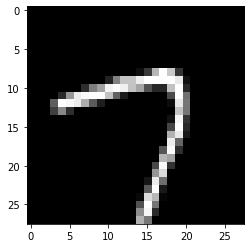

[[6.9208345e-22 9.4215788e-25 5.0140107e-15 3.4712327e-17 1.1147311e-28
  2.8130837e-18 9.0093319e-31 1.0000000e+00 2.0004152e-24 3.0002218e-15]]
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [56]:
n_rec = 1540
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show()
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)
print(prediction)
prediction = np.argmax(prediction)
print(prediction)
print(y_test[n_rec])